In [190]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [193]:
%matplotlib inline

In [194]:
import pandas_datareader as pdr
from pandas_datareader import data, wb


In [54]:
from datetime import datetime

In [55]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [56]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day,end.hour)

In [57]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [58]:
stock

'AMZN'

In [59]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-08,200.229996,196.339996,196.419998,200.100006,25881700.0,197.514709
2019-04-09,202.850006,199.229996,200.320007,199.500000,35768200.0,196.922470
2019-04-10,200.740005,198.179993,198.679993,200.619995,21695300.0,198.027985
2019-04-11,201.000000,198.440002,200.850006,198.949997,20900800.0,196.379578
2019-04-12,200.139999,196.210007,199.199997,198.869995,27760700.0,196.300613
...,...,...,...,...,...,...
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004
2020-04-02,245.149994,236.899994,240.339996,244.929993,41483500.0,244.929993
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004


In [60]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-08 to 2020-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


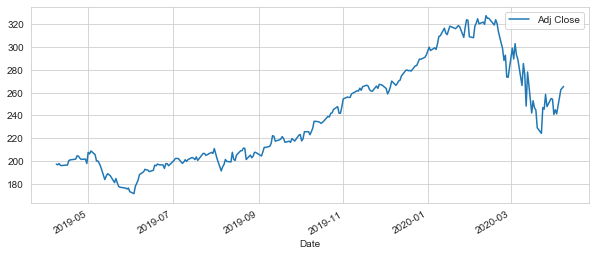

In [61]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

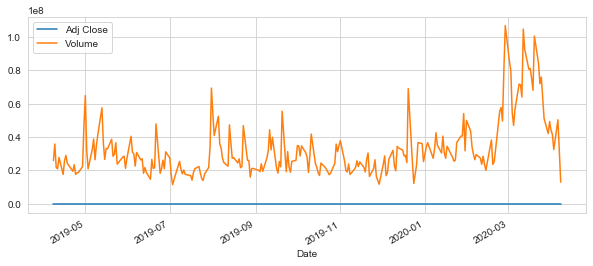

In [62]:

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
AAPL['Volume'].plot(legend=True,figsize=(10,4))

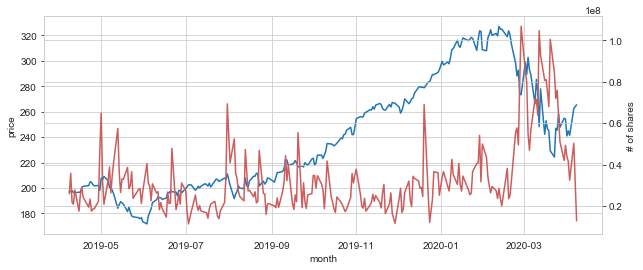

In [63]:
fig,ax = plt.subplots(figsize=(10,4))
fig.figsize=(10,4)
ax.plot(AAPL['Adj Close'])
ax.set_xlabel("month")
ax.set_ylabel("price")
ax2=ax.twinx()
ax2.plot(AAPL['Volume'],color='indianred')
ax2.set_ylabel("# of shares")
plt.show()

In [64]:
ma_day = [10,20,50]

In [65]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [66]:
for ma in AAPL['MA for 10 days']:
    AAPL['MA for 10 days'].rolling(window=10).mean()
AAPL['MA for 10 days']

Date
2019-04-08           NaN
2019-04-09           NaN
2019-04-10           NaN
2019-04-11           NaN
2019-04-12           NaN
                 ...    
2020-04-01    244.698001
2020-04-02    244.713000
2020-04-03    245.930000
2020-04-06    249.740001
2020-04-08    251.592000
Name: MA for 10 days, Length: 253, dtype: float64

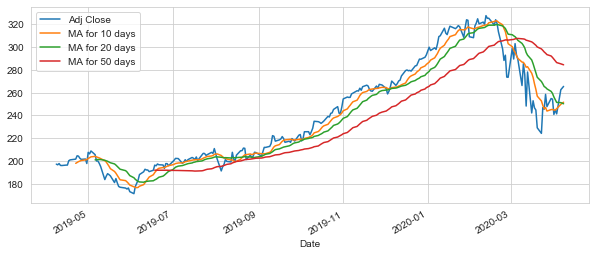

In [67]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

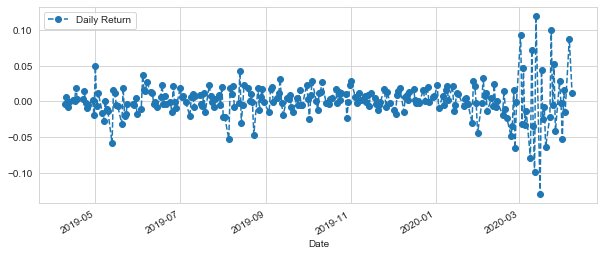

In [68]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [202]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-04-08,200.229996,196.339996,196.419998,200.100006,25881700.0,197.514709,NaN,NaN,NaN,NaN
2019-04-09,202.850006,199.229996,200.320007,199.500000,35768200.0,196.922470,NaN,NaN,NaN,-0.002998
2019-04-10,200.740005,198.179993,198.679993,200.619995,21695300.0,198.027985,NaN,NaN,NaN,0.005614
2019-04-11,201.000000,198.440002,200.850006,198.949997,20900800.0,196.379578,NaN,NaN,NaN,-0.008324
2019-04-12,200.139999,196.210007,199.199997,198.869995,27760700.0,196.300613,NaN,NaN,NaN,-0.000402


In [ ]:
rets.to_csv('retsforcopy.csv')

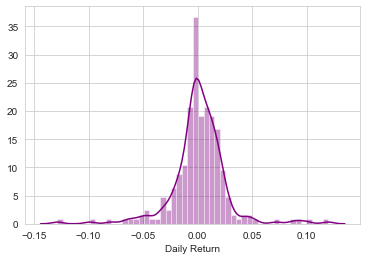

In [70]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='purple')

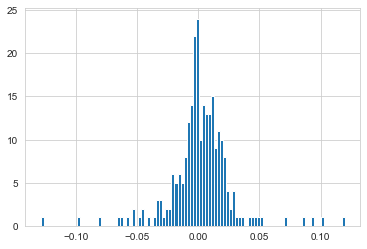

In [71]:
 AAPL['Daily Return'].hist(bins=100)

In [72]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [73]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-08,197.514709,1203.839966,118.363968,1849.859985
2019-04-09,196.922470,1197.250000,117.722450,1835.839966
2019-04-10,198.027985,1202.160034,118.620583,1847.329956
2019-04-11,196.379578,1204.619995,118.758751,1844.069946
2019-04-12,196.300613,1217.869995,119.370651,1843.060059


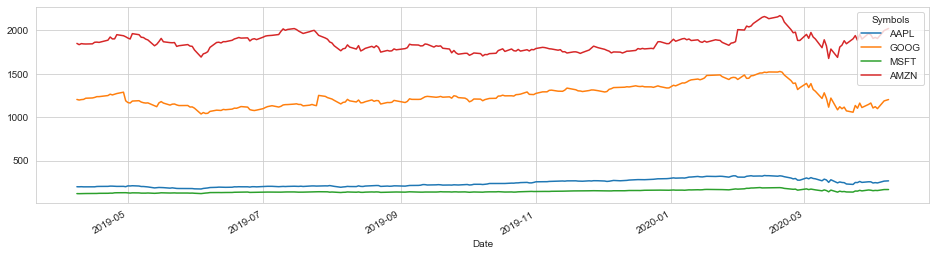

In [74]:
closing_df.plot(subplots=False,figsize=(16,4))

In [75]:
returns = closing_df.pct_change()

In [76]:
returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-08,NaN,NaN,NaN,NaN
2019-04-09,-0.002998,-0.005474,-0.005420,-0.007579
2019-04-10,0.005614,0.004101,0.007629,0.006259
2019-04-11,-0.008324,0.002046,0.001165,-0.001765
2019-04-12,-0.000402,0.010999,0.005152,-0.000548


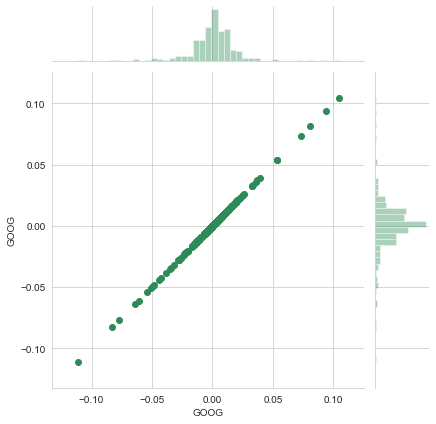

In [77]:
sns.jointplot('GOOG','GOOG',returns,kind='scatter',color = 'seagreen')

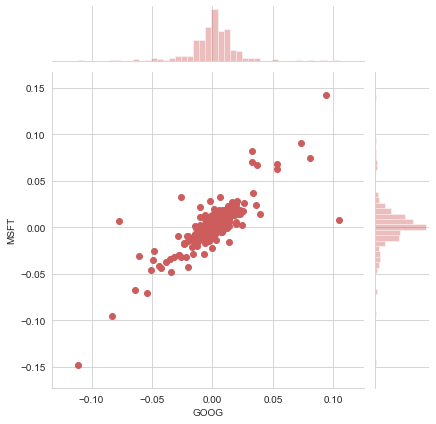

In [78]:
sns.jointplot('GOOG','MSFT',returns,kind='scatter',color = 'indianred')

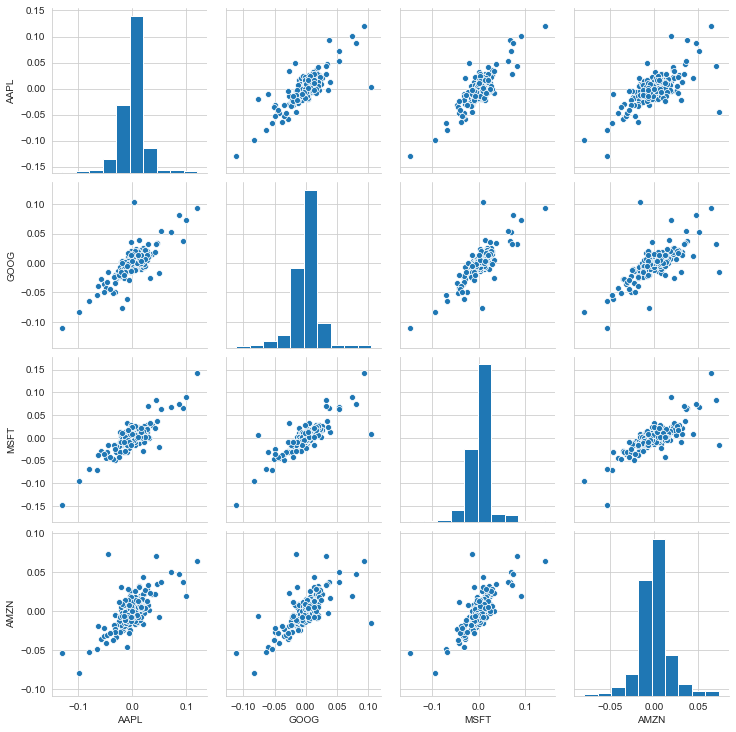

In [79]:
sns.pairplot(returns.dropna())

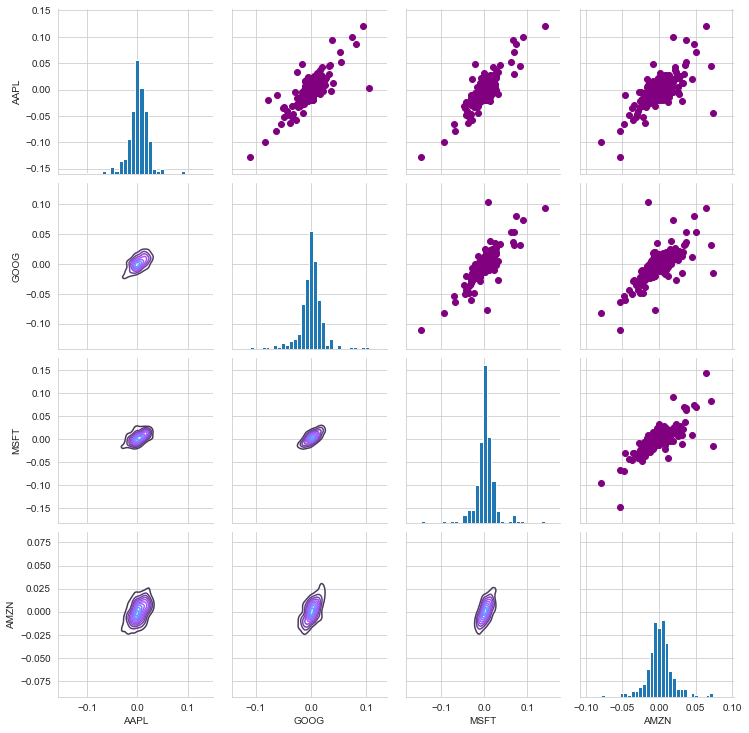

In [80]:
returns_fig = sns.PairGrid(returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

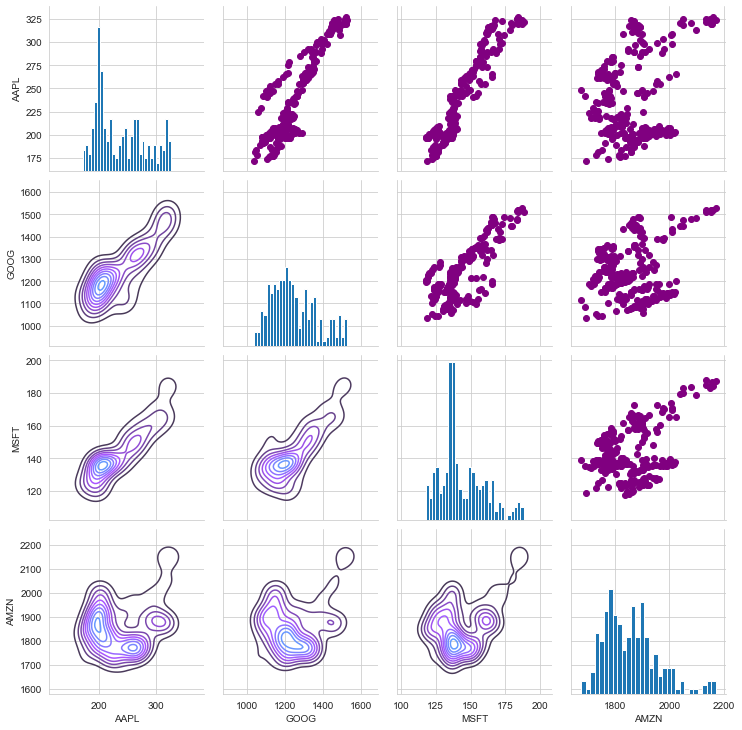

In [81]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

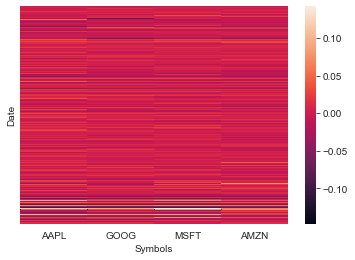

In [114]:
sns.heatmap(returns.dropna(),annot=False,yticklabels=False)

In [116]:
retcorr = returns.corr()

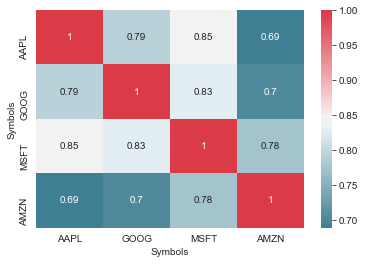

In [124]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(retcorr,annot=True,cmap=cmap)

In [125]:
closingcorr=closing_df.corr()

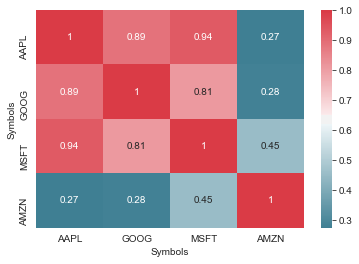

In [126]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(closingcorr,annot=True,cmap=cmap)

In [127]:
rets = returns.dropna()

In [198]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-09,-0.002998,-0.005474,-0.005420,-0.007579
2019-04-10,0.005614,0.004101,0.007629,0.006259
2019-04-11,-0.008324,0.002046,0.001165,-0.001765
2019-04-12,-0.000402,0.010999,0.005152,-0.000548
2019-04-15,0.001810,0.002652,0.000827,0.000982


In [199]:
rets.to_csv('retsforcopy.csv')

In [129]:
area = np.pi*20